# 電気料金とガス料金をgoogle spreadsheetに入力する

各種公共料金をGoogle Spreadsheetに入力しているのだが、どうもズボラなため数カ月分に渡って入力を忘れてしまう事がある。そのたびに明細を見て手入力していたのだがどうもそれが面倒なのでcsvデータをダウンロードして勝手に入力してしまえと思いついてそうしてみた。

## 1. 電気のデータを読み込む

まずは電気料金のcsvを読み込んで年月毎のdictに保持する。

電気料金のcsvはでんき家計簿に登録するとダウンロードが出来るのでそれを用いる。

In [21]:
import csv

FILEDIR="/Users/makoto-y/Downloads/"
file='ELECT_USAGE_20201109223152.csv'

year_month_dict = {} 

with open(FILEDIR+file, encoding="shift_jis") as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        row = [s.replace('714', '123') for s in row]
        row = [s.replace('33094-40811-1-08', '12345-67890-1-00') for s in row]
        print(row)
        if i == 5:
            break

['契約種別', '事業所コード', 'お客さま番号', '年月', '使用日数(日間)', '請求金額(円)', '使用量総計', '使用量内訳(昼間/平日)', '使用量内訳(朝晩/ピーク)', '使用量内訳(夜間/土日)']
['従量電灯B', '123', '12345-67890-1-00', '2018/12', '30', '8918', '306', '', '', '']
['従量電灯B', '123', '12345-67890-1-00', '2019/01', '33', '12881', '426', '', '', '']
['従量電灯B', '123', '12345-67890-1-00', '2019/02', '29', '12553', '412', '', '', '']
['従量電灯B', '123', '12345-67890-1-00', '2019/03', '28', '9064', '304', '', '', '']
['従量電灯B', '123', '12345-67890-1-00', '2019/04', '30', '7592', '255', '', '', '']


In [25]:
import csv

def electlicity():
    """
    電気のデータを辞書で返却
    """
 
    FILEDIR="/path/to/target/"
    file='ELECT_USAGE_20201109223152.csv'
 
    year_month_dict = {} 
 
    with open(FILEDIR+file, encoding="shift_jis") as f:
        reader = csv.reader(f)
        for row in reader:
            if row[0] != "従量電灯B":
                continue
            year_month_dict[row[3]] = {'電気代':row[5], '電気(KWh)':row[6]}
    return year_month_dict
    
print(electlicity())

{'2018/12': {'電気代': '8918', '電気(KWh)': '306'}, '2019/01': {'電気代': '12881', '電気(KWh)': '426'}, '2019/02': {'電気代': '12553', '電気(KWh)': '412'}, '2019/03': {'電気代': '9064', '電気(KWh)': '304'}, '2019/04': {'電気代': '7592', '電気(KWh)': '255'}, '2019/05': {'電気代': '7641', '電気(KWh)': '259'}, '2019/06': {'電気代': '6598', '電気(KWh)': '224'}, '2019/07': {'電気代': '7015', '電気(KWh)': '240'}, '2019/08': {'電気代': '9851', '電気(KWh)': '339'}, '2019/09': {'電気代': '12141', '電気(KWh)': '415'}, '2019/10': {'電気代': '8520', '電気(KWh)': '301'}, '2019/11': {'電気代': '8066', '電気(KWh)': '280'}, '2019/12': {'電気代': '7510', '電気(KWh)': '261'}, '2020/01': {'電気代': '11897', '電気(KWh)': '406'}, '2020/02': {'電気代': '7300', '電気(KWh)': '255'}, '2020/03': {'電気代': '7012', '電気(KWh)': '244'}, '2020/04': {'電気代': '7925', '電気(KWh)': '277'}, '2020/05': {'電気代': '7398', '電気(KWh)': '257'}, '2020/06': {'電気代': '6806', '電気(KWh)': '236'}, '2020/07': {'電気代': '7836', '電気(KWh)': '277'}, '2020/08': {'電気代': '9685', '電気(KWh)': '344'}, '2020/09': {'電気代': '13113', '

## 2. ガスのデータを読み込む

同じくガス料金のcsvデータを年月毎にdictに保持する

In [22]:

FILEDIR="/Users/makoto-y/Downloads/"
file='ChargeAmount_20201115093719.csv'  # ガス代

year_month_dict = {}
with open(FILEDIR+file, encoding="shift_jis") as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        row = [s.replace('1780-347-0032', '1234-567-8901') for s in row]
        print(row)
        if i == 5:
            break


['# ガス月別料金・使用量']
['お客さま番号', '契約種別', '請求年月日', '使用期間開始日', '使用期間終了日', '料金', '使用量']
['1234-567-8901', '一般契約', '2018/12/13', '2018/11/13', '2018/12/13', '9876', '68']
['1234-567-8901', '一般契約', '2019/1/16', '2018/12/14', '2019/1/16', '16932', '121']
['1234-567-8901', '一般契約', '2019/2/12', '2019/1/17', '2019/2/12', '15168', '106']
['1234-567-8901', '一般契約', '2019/3/12', '2019/2/13', '2019/3/12', '15668', '109']


In [26]:
def gas():
    """
    ガスのデータを辞書で返却
    """

    FILEDIR="/path/to/target/"
    file='ChargeAmount_20201115093719.csv'  # ガス代

    year_month_dict = {}
    with open(FILEDIR+file, encoding="shift_jis") as f:
        reader = csv.reader(f)
        for row in reader:
            if row[0] != "1234-567-8901":
                continue
            tmp = row[2].split('/')
            year_month = f'{tmp[0]}/{tmp[1].zfill(2)}'
            year_month_dict[year_month] = {'ガス代':row[5], 'ガス(m*3)':row[6]}

    return year_month_dict

print(gas())

{'2018/12': {'ガス代': '9876', 'ガス(m*3)': '68'}, '2019/01': {'ガス代': '16932', 'ガス(m*3)': '121'}, '2019/02': {'ガス代': '15168', 'ガス(m*3)': '106'}, '2019/03': {'ガス代': '15668', 'ガス(m*3)': '109'}, '2019/04': {'ガス代': '12579', 'ガス(m*3)': '86'}, '2019/05': {'ガス代': '9190', 'ガス(m*3)': '61'}, '2019/06': {'ガス代': '4480', 'ガス(m*3)': '26'}, '2019/07': {'ガス代': '4824', 'ガス(m*3)': '29'}, '2019/08': {'ガス代': '3858', 'ガス(m*3)': '22'}, '2019/09': {'ガス代': '2428', 'ガス(m*3)': '12'}, '2019/10': {'ガス代': '3116', 'ガス(m*3)': '17'}, '2019/11': {'ガス代': '6028', 'ガス(m*3)': '39'}, '2019/12': {'ガス代': '9969', 'ガス(m*3)': '70'}, '2020/01': {'ガス代': '14458', 'ガス(m*3)': '106'}, '2020/02': {'ガス代': '13514', 'ガス(m*3)': '99'}, '2020/03': {'ガス代': '11185', 'ガス(m*3)': '80'}, '2020/04': {'ガス代': '10692', 'ガス(m*3)': '76'}, '2020/05': {'ガス代': '7142', 'ガス(m*3)': '48'}, '2020/06': {'ガス代': '3716', 'ガス(m*3)': '21'}, '2020/07': {'ガス代': '3161', 'ガス(m*3)': '17'}, '2020/08': {'ガス代': '3014', 'ガス(m*3)': '16'}, '2020/09': {'ガス代': '2424', 'ガス(m*3)': '12'

## 3. 電気とガスのデータをマージする

次に電気料金とガス料金のdict型のデータを年月でマージしたdictを生成する

In [27]:
def get_data_dict():
    """
    CSVから作成したデータをそれぞれ取得してマージする
    """

    data_dict = {}

    elec_dict = electlicity()
    gas_dict = gas()

    data_dict = elec_dict
    for key, value in elec_dict.items():
        data_dict[key].update(gas_dict[key])

    return data_dict

print(get_data_dict())


{'2018/12': {'電気代': '8918', '電気(KWh)': '306', 'ガス代': '9876', 'ガス(m*3)': '68'}, '2019/01': {'電気代': '12881', '電気(KWh)': '426', 'ガス代': '16932', 'ガス(m*3)': '121'}, '2019/02': {'電気代': '12553', '電気(KWh)': '412', 'ガス代': '15168', 'ガス(m*3)': '106'}, '2019/03': {'電気代': '9064', '電気(KWh)': '304', 'ガス代': '15668', 'ガス(m*3)': '109'}, '2019/04': {'電気代': '7592', '電気(KWh)': '255', 'ガス代': '12579', 'ガス(m*3)': '86'}, '2019/05': {'電気代': '7641', '電気(KWh)': '259', 'ガス代': '9190', 'ガス(m*3)': '61'}, '2019/06': {'電気代': '6598', '電気(KWh)': '224', 'ガス代': '4480', 'ガス(m*3)': '26'}, '2019/07': {'電気代': '7015', '電気(KWh)': '240', 'ガス代': '4824', 'ガス(m*3)': '29'}, '2019/08': {'電気代': '9851', '電気(KWh)': '339', 'ガス代': '3858', 'ガス(m*3)': '22'}, '2019/09': {'電気代': '12141', '電気(KWh)': '415', 'ガス代': '2428', 'ガス(m*3)': '12'}, '2019/10': {'電気代': '8520', '電気(KWh)': '301', 'ガス代': '3116', 'ガス(m*3)': '17'}, '2019/11': {'電気代': '8066', '電気(KWh)': '280', 'ガス代': '6028', 'ガス(m*3)': '39'}, '2019/12': {'電気代': '7510', '電気(KWh)': '261', 'ガス代': '

## 4. Google Spreadsheetにアクセスする

Google Spreadsheetへアクセスするためにはアクセス権の設定等をいろいろと
やる必要がある。

やり方はいろんなところにあるので今回は
https://tanuhack.com/operate-spreadsheet/
を参考にさせて貰った。


In [28]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials

TARGET_WORKSHEET='python_test'
CREDENTIAL_JSON='/path/to/target/python-spreadsheet-xxxx-xxxx.json'

#共有設定したスプレッドシートキーを変数[SPREADSHEET_KEY]に格納する。
# （例：https://docs.google.com/spreadsheets/d/××××/edit#gid=0） のxxxx
SPREADSHEET_KEY = 'xxxxxx_xxx-xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'

def koukyo97():

    #2つのAPIを記述しないとリフレッシュトークンを3600秒毎に発行し続けなければならない
    scope = ['https://spreadsheets.google.com/feeds','https://www.googleapis.com/auth/drive']

    #認証情報設定
    #ダウンロードしたjsonファイル名をクレデンシャル変数に設定（秘密鍵、Pythonファイルから読み込みしやすい位置に置く）
    credentials = ServiceAccountCredentials.from_json_keyfile_name(CREDENTIAL_JSON, scope)

    #OAuth2の資格情報を使用してGoogle APIにログインします。
    gc = gspread.authorize(credentials)

    #共有設定したスプレッドシートを開く
    ws = gc.open_by_key(SPREADSHEET_KEY).worksheet(TARGET_WORKSHEET)

    # https://tanuhack.com/library-gspread/#i-8
    # APIの使い方

    return ws

## 5. スプレッドシートの列のアルファベットと数字を相互に変換する関数を用意する

このぐらいはGoogle Spreadsheetの標準のAPIで用意してくれていて良いと思うが
残念ながらなかったのでググって探して見つけたものを使った。

In [29]:
def toNum(alphabet):
    """
    アルファベットから数字を
    https://keimina.hatenablog.jp/entry/2018/01/31/213131 から
    """             
    total = 0
    for n, i in enumerate(alphabet[::-1]):
        chr_num = ord(i.lower())
        chr_A_num = ord('a')
        total +=  (1 + chr_num - chr_A_num)* (26**n)
    return total

def toAlpha(num):
    """
    数字からアルファベットを返す関数
    https://tanuhack.com/gspread-dataframe/　から
    """
    if num<=26:
        return chr(64+num)
    elif num%26==0:
        return toAlpha(num//26-1)+chr(90)
    else:
        return toAlpha(num//26)+chr(64+num%26)

## 6. いよいよGoogle Spreadsheetにデータを書き込む

方法は以下の通り。

1. Google Spreadsheetの当該ワークシートを一旦二次元配列に読み込んでからTARGET_LISTに該当する列のデータで抜けているところを探し出す。
2. 抜けているデータに該当するデータがdict型のデータにあった場合にその入力する位置の行番号と列番号と入力データの配列を配列データにどんどんストックする。
3. 最後まで終わったら配列にストックしたデータをGoogle Spreadsheetに入力する。

ちなみに自分の場合は数十年分のデータが既にスプレッドシートに入力済みであるため直近の12ヶ月分の範囲だけを対象としてデータを入力するようにしている。

In [30]:
TARGET_LIST = ['電気代' ,'電気(KWh)' ,'ガス代' ,'ガス(m*3)', 'IIJ-mio' ,'WOWOW' ,'楽天でんわ']

def update_each():
    """
    セル1つずつに対してAPIを呼び出して入力する。
    人が手作業で入力しているのと同じ状態に近い。
    空白セルにしか操作しないので元の数式やデータが壊れることがない。
    """

    worksheet = koukyo97()

    # 日付の入っている行数を求める
    col_list = worksheet.col_values(1)  # 1列目(日付)のリスト
    for row_count, s in enumerate(col_list):
        if s == "":
            break

    # 二次元配列にワークシートの値を全て格納
    cell_list = worksheet.get_all_values()

    # 元になるデータを辞書形式に読み込む
    data_dict = get_data_dict()

    for i, row_list in enumerate(cell_list, 1):  # 1から始める
        if i == 1:  # 見出し
            my_date_index = row_list.index('年月')
            header_list = row_list
            continue

        if i > row_count-12: # 過去1年分のデータ
            update_datam = []

            year_month = row_list[my_date_index].replace('-','/')

            for tgt in TARGET_LIST:
                if row_list[header_list.index(tgt)] == "":
                    if year_month in data_dict.keys():
                        if tgt in data_dict[year_month]:
                            update_datam.append([i, header_list.index(tgt)+1, data_dict[year_month][tgt]])

            for data in update_datam:
                print(f'({data[0]}, {toAlpha(data[1])}) = {data[2]}')
                #worksheet.update_cell(data[0], data[1], data[2])
                
update_each()

(5, D) = 11185
(7, B) = 7398
(8, E) = 21
(9, C) = 277
(11, D) = 2424
(12, B) = 9257


これでちまちまと電気料金の明細やガス料金の明細を見ながらGoogle Spreadsheetにデータを入力する必要がなくなって数カ月分入力をサボってもサクッとデータ入力できるようになった。

ちなみにここでは電気とガスだけ紹介したが、水道や携帯電話等もろもろのデータも入手して入力できるようにしているので随分と楽になった。

まあ正直なところ家計を振り返るために毎月料金を確認しつつ家計簿をつけるという行為を行うのが良いのだと思うのだが・・・。



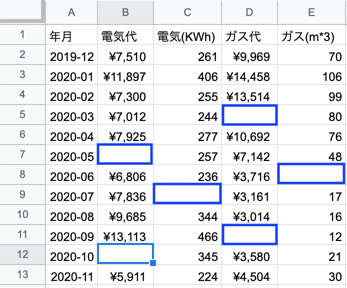

In [33]:
from PIL import Image

filename = "googlespreadsheet_sample.png"

im = Image.open(filename)
im = im.resize((int(im.width / 2), int(im.height / 2)))
im